In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

file_path = '/content/drive/My Drive/Eye-Tracking Dataset/merged_data.csv'

data = pd.read_csv(file_path)

<ipython-input-2-1ab81708951c>:5: DtypeWarning: Columns (7,12,14,15,16,19,20,21,22,26,27,28,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [3]:
col = data.columns
len(col)

59

In [4]:
lst1 = [str(i) for i in range(1,60)]

In [5]:
rows = data[data['Participant'].isin(lst1)]

In [6]:
rows.to_csv("data.csv")

In [7]:
df = pd.read_csv("data.csv")
df.shape

<ipython-input-7-376715b5e662>:1: DtypeWarning: Columns (13,15,16,17,20,21,22,23,27,28,29,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv")


(1015142, 60)

In [8]:
pd.DataFrame(df.dtypes, columns = ["Data Type"])

,Data Type
Unnamed: 0.1,int64
Unnamed: 0,int64
RecordingTime [ms],float64
Time of Day [h:m:s:ms],object
Trial,object
Stimulus,object
Export Start Trial Time [ms],float64
Export End Trial Time [ms],float64
Participant,int64
Color,object


In [9]:
col = df.columns
len(col)

60

In [10]:
# Checking for mixed-type values in each column
mixed_type_columns = df.applymap(type).nunique() > 1

# Listing columns with mixed-type values
columns_with_mixed_types = mixed_type_columns[mixed_type_columns].index.tolist()

print("Columns with Mixed-Type Values:", columns_with_mixed_types)

Columns with Mixed-Type Values: ['Category Left', 'Index Left', 'Pupil Diameter Right [mm]', 'Pupil Diameter Left [mm]', 'Point of Regard Left X [px]', 'Point of Regard Left Y [px]', 'AOI Name Right', 'AOI Name Left', 'Gaze Vector Left X', 'Gaze Vector Left Y', 'Gaze Vector Left Z', 'Pupil Size Right X [px]', 'Pupil Size Right Y [px]', 'Pupil Size Left X [px]', 'Pupil Size Left Y [px]', 'Eye Position Right X [mm]', 'Eye Position Right Y [mm]', 'Eye Position Right Z [mm]', 'Eye Position Left X [mm]', 'Eye Position Left Y [mm]', 'Eye Position Left Z [mm]', 'Pupil Position Right X [px]', 'Pupil Position Right Y [px]', 'Pupil Position Left X [px]', 'Pupil Position Left Y [px]', 'Port Status', 'AOI Group Right', 'AOI Scope Right', 'AOI Order Right', 'AOI Group Left', 'AOI Scope Left', 'AOI Order Binocular', "groupe d'enfants"]


In [11]:
for column in columns_with_mixed_types:
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [12]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,RecordingTime [ms],Export Start Trial Time [ms],Export End Trial Time [ms],Participant,Tracking Ratio [%],Category Left,Index Left,Pupil Diameter Right [mm],...,Pupil Position Left X [px],Pupil Position Left Y [px],Port Status,AOI Group Right,AOI Scope Right,AOI Order Right,AOI Group Left,AOI Scope Left,AOI Order Binocular,groupe d'enfants
count,1.015142e+06,1.015142e+06,1.015142e+06,1015142.0,1.015142e+06,1.015142e+06,1.015142e+06,0.0,911361.000000,635267.000000,...,863202.000000,863202.000000,469390.0,0.0,0.0,6438.000000,0.0,0.0,6438.000000,0.0
mean,1.136375e+06,7.460521e+04,3.207003e+06,0.0,3.066610e+04,3.725915e+01,7.431016e+01,NaN,23.160146,3.631987,...,575.836328,502.949108,0.0,NaN,NaN,6.437714,NaN,NaN,6.437714,NaN
std,6.614971e+05,8.573558e+04,3.467337e+06,0.0,2.172324e+04,1.652566e+01,2.821990e+01,NaN,27.630231,1.253131,...,321.698448,285.253511,0.0,NaN,NaN,1.579764,NaN,NaN,1.579764,NaN
min,0.000000e+00,0.000000e+00,8.358886e+04,0.0,2.659272e+03,1.000000e+00,0.000000e+00,NaN,1.000000,0.000000,...,0.000000,0.000000,0.0,NaN,NaN,2.000000,NaN,NaN,2.000000,NaN
25%,5.524532e+05,1.988500e+04,9.403279e+05,0.0,2.900033e+03,2.500000e+01,6.047070e+01,NaN,3.000000,3.063200,...,448.733550,323.871525,0.0,NaN,NaN,7.000000,NaN,NaN,7.000000,NaN
50%,1.179102e+06,4.314400e+04,1.806667e+06,0.0,4.882296e+04,3.700000e+01,8.533950e+01,NaN,10.000000,3.686000,...,635.576600,574.314550,0.0,NaN,NaN,7.000000,NaN,NaN,7.000000,NaN
75%,1.705920e+06,8.611200e+04,3.715978e+06,0.0,4.911874e+04,5.400000e+01,9.655720e+01,NaN,35.000000,4.428200,...,798.067575,724.554425,0.0,NaN,NaN,7.000000,NaN,NaN,7.000000,NaN
max,2.228223e+06,3.862790e+05,1.515597e+07,0.0,5.229981e+04,5.900000e+01,1.000000e+02,NaN,155.000000,9.923800,...,1248.105900,1018.228200,0.0,NaN,NaN,7.000000,NaN,NaN,7.000000,NaN


In [13]:
df.head()

,Unnamed: 0.1,Unnamed: 0,RecordingTime [ms],Time of Day [h:m:s:ms],Trial,Stimulus,Export Start Trial Time [ms],Export End Trial Time [ms],Participant,Color,...,Pupil Position Left X [px],Pupil Position Left Y [px],Port Status,AOI Group Right,AOI Scope Right,AOI Order Right,AOI Group Left,AOI Scope Left,AOI Order Binocular,groupe d'enfants
0,0,0,4780015.315,13:22:17:254,Trial020,20 eye tracking (ballon droite).avi,0.0,52058.676,50,Coral,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,4780020.865,13:22:17:260,Trial020,20 eye tracking (ballon droite).avi,0.0,52058.676,50,Coral,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,4780040.758,13:22:17:279,Trial020,20 eye tracking (ballon droite).avi,0.0,52058.676,50,Coral,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,4780080.503,13:22:17:319,Trial020,20 eye tracking (ballon droite).avi,0.0,52058.676,50,Coral,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,4780120.360,13:22:17:359,Trial020,20 eye tracking (ballon droite).avi,0.0,52058.676,50,Coral,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
col

Index(['Unnamed: 0.1', 'Unnamed: 0', 'RecordingTime [ms]',
       'Time of Day [h:m:s:ms]', 'Trial', 'Stimulus',
       'Export Start Trial Time [ms]', 'Export End Trial Time [ms]',
       'Participant', 'Color', 'Tracking Ratio [%]', 'Category Group',
       'Category Right', 'Category Left', 'Index Right', 'Index Left',
       'Pupil Diameter Right [mm]', 'Pupil Diameter Left [mm]',
       'Point of Regard Right X [px]', 'Point of Regard Right Y [px]',
       'Point of Regard Left X [px]', 'Point of Regard Left Y [px]',
       'AOI Name Right', 'AOI Name Left', 'Gaze Vector Right X',
       'Gaze Vector Right Y', 'Gaze Vector Right Z', 'Gaze Vector Left X',
       'Gaze Vector Left Y', 'Gaze Vector Left Z', 'Annotation Name',
       'Annotation Description', 'Annotation Tags', 'Mouse Position X [px]',
       'Mouse Position Y [px]', 'Scroll Direction X', 'Scroll Direction Y',
       'Content', 'Pupil Size Right X [px]', 'Pupil Size Right Y [px]',
       'Pupil Size Left X [px]', 'Pup

In [15]:
threshold = len(df) * 0.5

# Drop columns with more than 50% NaN values
df_cleaned = df.dropna(axis=1, thresh=threshold)

In [16]:
df_cleaned.head()

,Unnamed: 0.1,Unnamed: 0,RecordingTime [ms],Time of Day [h:m:s:ms],Trial,Stimulus,Export Start Trial Time [ms],Export End Trial Time [ms],Participant,Color,...,Eye Position Right X [mm],Eye Position Right Y [mm],Eye Position Right Z [mm],Eye Position Left X [mm],Eye Position Left Y [mm],Eye Position Left Z [mm],Pupil Position Right X [px],Pupil Position Right Y [px],Pupil Position Left X [px],Pupil Position Left Y [px]
0,0,0,4780015.315,13:22:17:254,Trial020,20 eye tracking (ballon droite).avi,0.0,52058.676,50,Coral,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,4780020.865,13:22:17:260,Trial020,20 eye tracking (ballon droite).avi,0.0,52058.676,50,Coral,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,4780040.758,13:22:17:279,Trial020,20 eye tracking (ballon droite).avi,0.0,52058.676,50,Coral,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,4780080.503,13:22:17:319,Trial020,20 eye tracking (ballon droite).avi,0.0,52058.676,50,Coral,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,4780120.360,13:22:17:359,Trial020,20 eye tracking (ballon droite).avi,0.0,52058.676,50,Coral,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df_filled = df_cleaned.fillna(df.median())
df_filled.describe()

<ipython-input-17-fb968d328ff5>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filled = df_cleaned.fillna(df.median())


,Unnamed: 0.1,Unnamed: 0,RecordingTime [ms],Export Start Trial Time [ms],Export End Trial Time [ms],Participant,Tracking Ratio [%],Index Left,Pupil Diameter Right [mm],Pupil Diameter Left [mm],...,Eye Position Right X [mm],Eye Position Right Y [mm],Eye Position Right Z [mm],Eye Position Left X [mm],Eye Position Left Y [mm],Eye Position Left Z [mm],Pupil Position Right X [px],Pupil Position Right Y [px],Pupil Position Left X [px],Pupil Position Left Y [px]
count,1.015142e+06,1.015142e+06,1.015142e+06,1015142.0,1.015142e+06,1.015142e+06,1.015142e+06,1.015142e+06,1.015142e+06,1.015142e+06,...,1.015142e+06,1.015142e+06,1.015142e+06,1.015142e+06,1.015142e+06,1.015142e+06,1.015142e+06,1.015142e+06,1.015142e+06,1.015142e+06
mean,1.136375e+06,7.460521e+04,3.207003e+06,0.0,3.066610e+04,3.725915e+01,7.431016e+01,2.181475e+01,3.652199e+00,3.600180e+00,...,-4.752532e+00,-2.133156e+01,5.219895e+02,-2.660301e+00,-2.131950e+01,5.224453e+02,5.857509e+02,5.142146e+02,5.847779e+02,5.136306e+02
std,6.614971e+05,8.573558e+04,3.467337e+06,0.0,2.172324e+04,1.652566e+01,2.821990e+01,2.648164e+01,9.916583e-01,9.027053e-01,...,3.710776e+01,3.942638e+01,2.254578e+02,4.332263e+01,3.771359e+01,2.237709e+02,3.016950e+02,2.682761e+02,2.974128e+02,2.642705e+02
min,0.000000e+00,0.000000e+00,8.358886e+04,0.0,2.659272e+03,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,-1.838084e+02,-1.377982e+02,0.000000e+00,-1.533634e+02,-1.370964e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.524532e+05,1.988500e+04,9.403279e+05,0.0,2.900033e+03,2.500000e+01,6.047070e+01,4.000000e+00,3.513800e+00,3.500000e+00,...,-2.595165e+01,-5.047620e+01,5.152644e+02,-2.173307e+01,-4.841595e+01,5.229458e+02,4.653191e+02,3.526103e+02,5.008988e+02,3.743461e+02
50%,1.179102e+06,4.314400e+04,1.806667e+06,0.0,4.882296e+04,3.700000e+01,8.533950e+01,1.000000e+01,3.686000e+00,3.639700e+00,...,0.000000e+00,-2.088100e+01,6.014192e+02,0.000000e+00,-1.900795e+01,6.004000e+02,6.526963e+02,5.826397e+02,6.355766e+02,5.743146e+02
75%,1.705920e+06,8.611200e+04,3.715978e+06,0.0,4.911874e+04,5.400000e+01,9.655720e+01,3.100000e+01,3.901200e+00,3.797000e+00,...,1.093310e+01,0.000000e+00,6.489308e+02,1.860182e+01,0.000000e+00,6.448755e+02,7.920000e+02,7.207098e+02,7.620827e+02,7.078854e+02
max,2.228223e+06,3.862790e+05,1.515597e+07,0.0,5.229981e+04,5.900000e+01,1.000000e+02,1.550000e+02,9.923800e+00,1.014190e+01,...,1.628493e+02,1.223424e+02,8.567968e+02,1.605170e+02,1.134303e+02,8.796211e+02,1.367770e+03,1.019675e+03,1.248106e+03,1.018228e+03


In [18]:
df_filled.shape

(1015142, 47)

In [19]:
# Counting the number of categorical columns

categorical_columns_count = len(df_filled.select_dtypes(include='object').columns)
categorical_columns_count

20

In [20]:
df_filled.dtypes

Unnamed: 0.1                      int64
Unnamed: 0                        int64
RecordingTime [ms]              float64
Time of Day [h:m:s:ms]           object
Trial                            object
Stimulus                         object
Export Start Trial Time [ms]    float64
Export End Trial Time [ms]      float64
Participant                       int64
Color                            object
Tracking Ratio [%]              float64
Category Group                   object
Category Right                   object
Index Right                      object
Index Left                      float64
Pupil Diameter Right [mm]       float64
Pupil Diameter Left [mm]        float64
Point of Regard Right X [px]     object
Point of Regard Right Y [px]     object
Point of Regard Left X [px]     float64
Point of Regard Left Y [px]     float64
Gaze Vector Right X              object
Gaze Vector Right Y              object
Gaze Vector Right Z              object
Gaze Vector Left X              float64


In [21]:
file_path_2 = '/content/drive/My Drive/Eye-Tracking Dataset/Metadata_Participants.csv'
dataFrame = pd.read_csv(file_path_2)
dataFrame.rename(columns={'ParticipantID': 'Participant'}, inplace=True)

In [22]:
data = pd.merge(df_filled,dataFrame,on="Participant")

In [23]:
data.head()

,Unnamed: 0.1,Unnamed: 0,RecordingTime [ms],Time of Day [h:m:s:ms],Trial,Stimulus,Export Start Trial Time [ms],Export End Trial Time [ms],Participant,Color,...,Eye Position Left Y [mm],Eye Position Left Z [mm],Pupil Position Right X [px],Pupil Position Right Y [px],Pupil Position Left X [px],Pupil Position Left Y [px],Gender,Age,Class,CARS Score
0,0,0,4780015.315,13:22:17:254,Trial020,20 eye tracking (ballon droite).avi,0.0,52058.676,50,Coral,...,-19.00795,600.4,652.6963,582.6397,635.5766,574.31455,F,11.5,TD,NaN
1,1,1,4780020.865,13:22:17:260,Trial020,20 eye tracking (ballon droite).avi,0.0,52058.676,50,Coral,...,-19.00795,600.4,652.6963,582.6397,635.5766,574.31455,F,11.5,TD,NaN
2,2,2,4780040.758,13:22:17:279,Trial020,20 eye tracking (ballon droite).avi,0.0,52058.676,50,Coral,...,-19.00795,600.4,652.6963,582.6397,635.5766,574.31455,F,11.5,TD,NaN
3,3,3,4780080.503,13:22:17:319,Trial020,20 eye tracking (ballon droite).avi,0.0,52058.676,50,Coral,...,-19.00795,600.4,652.6963,582.6397,635.5766,574.31455,F,11.5,TD,NaN
4,4,4,4780120.360,13:22:17:359,Trial020,20 eye tracking (ballon droite).avi,0.0,52058.676,50,Coral,...,-19.00795,600.4,652.6963,582.6397,635.5766,574.31455,F,11.5,TD,NaN


In [24]:
data = data.drop(columns=["Participant","Gender","Age","CARS Score"])
data.shape

(1015142, 47)

In [25]:
data.head()

,Unnamed: 0.1,Unnamed: 0,RecordingTime [ms],Time of Day [h:m:s:ms],Trial,Stimulus,Export Start Trial Time [ms],Export End Trial Time [ms],Color,Tracking Ratio [%],...,Eye Position Right Y [mm],Eye Position Right Z [mm],Eye Position Left X [mm],Eye Position Left Y [mm],Eye Position Left Z [mm],Pupil Position Right X [px],Pupil Position Right Y [px],Pupil Position Left X [px],Pupil Position Left Y [px],Class
0,0,0,4780015.315,13:22:17:254,Trial020,20 eye tracking (ballon droite).avi,0.0,52058.676,Coral,78.5652,...,-20.881,601.4192,0.0,-19.00795,600.4,652.6963,582.6397,635.5766,574.31455,TD
1,1,1,4780020.865,13:22:17:260,Trial020,20 eye tracking (ballon droite).avi,0.0,52058.676,Coral,78.5652,...,-20.881,601.4192,0.0,-19.00795,600.4,652.6963,582.6397,635.5766,574.31455,TD
2,2,2,4780040.758,13:22:17:279,Trial020,20 eye tracking (ballon droite).avi,0.0,52058.676,Coral,78.5652,...,-20.881,601.4192,0.0,-19.00795,600.4,652.6963,582.6397,635.5766,574.31455,TD
3,3,3,4780080.503,13:22:17:319,Trial020,20 eye tracking (ballon droite).avi,0.0,52058.676,Coral,78.5652,...,-20.881,601.4192,0.0,-19.00795,600.4,652.6963,582.6397,635.5766,574.31455,TD
4,4,4,4780120.360,13:22:17:359,Trial020,20 eye tracking (ballon droite).avi,0.0,52058.676,Coral,78.5652,...,-20.881,601.4192,0.0,-19.00795,600.4,652.6963,582.6397,635.5766,574.31455,TD


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1015142 entries, 0 to 1015141
Data columns (total 47 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   Unnamed: 0.1                  1015142 non-null  int64  
 1   Unnamed: 0                    1015142 non-null  int64  
 2   RecordingTime [ms]            1015142 non-null  float64
 3   Time of Day [h:m:s:ms]        1015142 non-null  object 
 4   Trial                         1015142 non-null  object 
 5   Stimulus                      1015142 non-null  object 
 6   Export Start Trial Time [ms]  1015142 non-null  float64
 7   Export End Trial Time [ms]    1015142 non-null  float64
 8   Color                         1015142 non-null  object 
 9   Tracking Ratio [%]            1015142 non-null  float64
 10  Category Group                1015142 non-null  object 
 11  Category Right                1015142 non-null  object 
 12  Index Right                 

DATA VISUALISATION

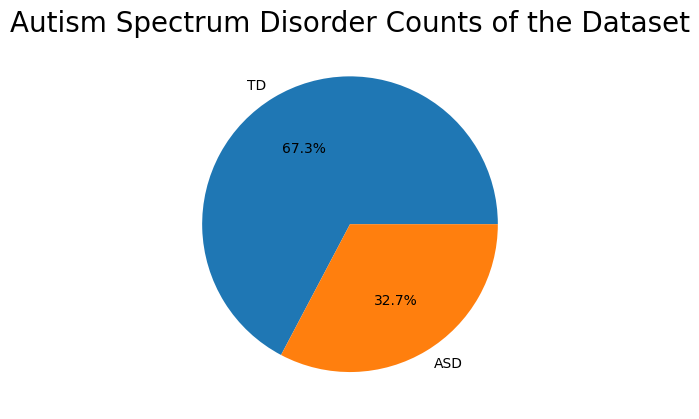

In [27]:
import matplotlib.pyplot as plt

# Replace 0 with 'TD' and 1 with 'ASD' in the 'Class' column
data['Class'] = data['Class'].replace({0: 'TD', 1: 'ASD'})

# Calculating the counts of each ASD trait category
asd_counts = data['Class'].value_counts()

# Creating the figure and axis
fig, ax = plt.subplots()

# Plotting the pie chart
ax.pie(asd_counts, labels=asd_counts.index, autopct='%1.1f%%')

# Setting the title
ax.set_title('Autism Spectrum Disorder Counts of the Dataset', fontsize=20)

# Visualising the chart
plt.show()

In [28]:
data['Class'].replace('TD', 0, inplace=True)
data['Class'].replace('ASD', 1, inplace=True)

data.head()

,Unnamed: 0.1,Unnamed: 0,RecordingTime [ms],Time of Day [h:m:s:ms],Trial,Stimulus,Export Start Trial Time [ms],Export End Trial Time [ms],Color,Tracking Ratio [%],...,Eye Position Right Y [mm],Eye Position Right Z [mm],Eye Position Left X [mm],Eye Position Left Y [mm],Eye Position Left Z [mm],Pupil Position Right X [px],Pupil Position Right Y [px],Pupil Position Left X [px],Pupil Position Left Y [px],Class
0,0,0,4780015.315,13:22:17:254,Trial020,20 eye tracking (ballon droite).avi,0.0,52058.676,Coral,78.5652,...,-20.881,601.4192,0.0,-19.00795,600.4,652.6963,582.6397,635.5766,574.31455,0
1,1,1,4780020.865,13:22:17:260,Trial020,20 eye tracking (ballon droite).avi,0.0,52058.676,Coral,78.5652,...,-20.881,601.4192,0.0,-19.00795,600.4,652.6963,582.6397,635.5766,574.31455,0
2,2,2,4780040.758,13:22:17:279,Trial020,20 eye tracking (ballon droite).avi,0.0,52058.676,Coral,78.5652,...,-20.881,601.4192,0.0,-19.00795,600.4,652.6963,582.6397,635.5766,574.31455,0
3,3,3,4780080.503,13:22:17:319,Trial020,20 eye tracking (ballon droite).avi,0.0,52058.676,Coral,78.5652,...,-20.881,601.4192,0.0,-19.00795,600.4,652.6963,582.6397,635.5766,574.31455,0
4,4,4,4780120.360,13:22:17:359,Trial020,20 eye tracking (ballon droite).avi,0.0,52058.676,Coral,78.5652,...,-20.881,601.4192,0.0,-19.00795,600.4,652.6963,582.6397,635.5766,574.31455,0


In [29]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

# Identifying object dtype columns
object_columns = data.select_dtypes(include='object').columns

# Initializing the LabelEncoder
label_encoder = LabelEncoder()

# Encoding the object dtype columns
for column in object_columns:
    data[column] = label_encoder.fit_transform(data[column])

print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1015142 entries, 0 to 1015141
Data columns (total 47 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   Unnamed: 0.1                  1015142 non-null  int64  
 1   Unnamed: 0                    1015142 non-null  int64  
 2   RecordingTime [ms]            1015142 non-null  float64
 3   Time of Day [h:m:s:ms]        1015142 non-null  int64  
 4   Trial                         1015142 non-null  int64  
 5   Stimulus                      1015142 non-null  int64  
 6   Export Start Trial Time [ms]  1015142 non-null  float64
 7   Export End Trial Time [ms]    1015142 non-null  float64
 8   Color                         1015142 non-null  int64  
 9   Tracking Ratio [%]            1015142 non-null  float64
 10  Category Group                1015142 non-null  int64  
 11  Category Right                1015142 non-null  int64  
 12  Index Right                 

In [30]:
# Correlation of each feature with the target

target_correlation = data.corr()['Class'].abs().sort_values(ascending=False)
print(target_correlation)

Class                           1.000000
Time of Day [h:m:s:ms]          0.505238
Tracking Ratio [%]              0.436856
Color                           0.272012
Gaze Vector Right Y             0.266509
Gaze Vector Left Y              0.247341
Gaze Vector Right Z             0.242883
Gaze Vector Left Z              0.233437
Point of Regard Left X [px]     0.202234
Point of Regard Right X [px]    0.189954
Point of Regard Left Y [px]     0.165137
Category Right                  0.149813
Point of Regard Right Y [px]    0.149664
Pupil Position Left X [px]      0.148236
Eye Position Right X [mm]       0.132220
Index Left                      0.120892
Pupil Size Right Y [px]         0.114110
Pupil Size Right X [px]         0.113654
RecordingTime [ms]              0.112191
Index Right                     0.110004
Eye Position Left Z [mm]        0.109043
Eye Position Left Y [mm]        0.108510
Eye Position Right Y [mm]       0.108089
Pupil Diameter Left [mm]        0.106494
Pupil Diameter R

In [31]:
# Removing the NaN correlation values since it doesn't have a valid correlation with the target variable.

features_with_nan_correlation = target_correlation[target_correlation.isna()].index

# Now we remove the columns from the data that give NaN correlation values and update the data

data_update = data.drop(columns=features_with_nan_correlation)

In [32]:
print(data_update.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1015142 entries, 0 to 1015141
Data columns (total 41 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   Unnamed: 0.1                  1015142 non-null  int64  
 1   Unnamed: 0                    1015142 non-null  int64  
 2   RecordingTime [ms]            1015142 non-null  float64
 3   Time of Day [h:m:s:ms]        1015142 non-null  int64  
 4   Trial                         1015142 non-null  int64  
 5   Stimulus                      1015142 non-null  int64  
 6   Export End Trial Time [ms]    1015142 non-null  float64
 7   Color                         1015142 non-null  int64  
 8   Tracking Ratio [%]            1015142 non-null  float64
 9   Category Group                1015142 non-null  int64  
 10  Category Right                1015142 non-null  int64  
 11  Index Right                   1015142 non-null  int64  
 12  Index Left                  

In [33]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import RandomForestRegressor

# Extracting features and target
M = data_update.drop(columns=['Class'])  # Dropping the target column
n = data_update['Class']  # Target column

# Calculating correlation matrix
correlation_matrix = M.corr().abs()

# Calculating mutual information between features and target
mutual_info = mutual_info_regression(M, n)

# Training a RandomForestRegressor to estimate feature importance
rf = RandomForestRegressor()
rf.fit(M, n)
feature_importance = rf.feature_importances_

# Calculating relevancy
relevancy = pd.DataFrame(mutual_info, index=M.columns, columns=['Relevancy (Mutual Information)'])

# Displaying the outputs
print("Relevancy (Mutual Information):")
print(relevancy)

Relevancy (Mutual Information):
                              Relevancy (Mutual Information)
Unnamed: 0.1                                        0.631825
Unnamed: 0                                          0.102253
RecordingTime [ms]                                  0.177644
Time of Day [h:m:s:ms]                              0.495306
Trial                                               0.006357
Stimulus                                            0.067504
Export End Trial Time [ms]                          0.627326
Color                                               0.252547
Tracking Ratio [%]                                  0.568379
Category Group                                      0.000000
Category Right                                      0.032704
Index Right                                         0.019430
Index Left                                          0.013688
Pupil Diameter Right [mm]                           0.100123
Pupil Diameter Left [mm]                            0

In [34]:
# Filtering features with relevancy score of 0
features_with_zero_relevancy = relevancy[relevancy['Relevancy (Mutual Information)'] == 0]

# Extracting and displaying the names of features with zero relevancy score
zero_relevancy_feature_names = features_with_zero_relevancy.index.tolist()

# Displaying the names of features with zero relevancy score
print("Features with relevancy score of zero:")
print(zero_relevancy_feature_names)

Features with relevancy score of zero:
['Category Group', 'Mouse Position X [px]', 'Content']


In [35]:
# Dropping the features with relevancy score of zero

data_update = data_update.drop(columns = zero_relevancy_feature_names)
data_update.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1015142 entries, 0 to 1015141
Data columns (total 38 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   Unnamed: 0.1                  1015142 non-null  int64  
 1   Unnamed: 0                    1015142 non-null  int64  
 2   RecordingTime [ms]            1015142 non-null  float64
 3   Time of Day [h:m:s:ms]        1015142 non-null  int64  
 4   Trial                         1015142 non-null  int64  
 5   Stimulus                      1015142 non-null  int64  
 6   Export End Trial Time [ms]    1015142 non-null  float64
 7   Color                         1015142 non-null  int64  
 8   Tracking Ratio [%]            1015142 non-null  float64
 9   Category Right                1015142 non-null  int64  
 10  Index Right                   1015142 non-null  int64  
 11  Index Left                    1015142 non-null  float64
 12  Pupil Diameter Right [mm]   

In [36]:
data_update.shape

(1015142, 38)

In [37]:
X = data_update.drop(columns=["Class"])
y = data_update["Class"]

print("The independent variables:\n", X)
print("\nThe dependent variable:\n", y)

The independent variables:
          Unnamed: 0.1  Unnamed: 0  RecordingTime [ms]  Time of Day [h:m:s:ms]  \
0                   0           0         4780015.315                  411425   
1                   1           1         4780020.865                  411426   
2                   2           2         4780040.758                  411427   
3                   3           3         4780080.503                  411428   
4                   4           4         4780120.360                  411429   
...               ...         ...                 ...                     ...   
1015137       2101560        6344          280132.672                  350775   
1015138       2101561        6345          280172.432                  350778   
1015139       2101562        6346          280212.313                  350781   
1015140       2101563        6347          280232.192                  350783   
1015141       2101564        6348          280252.050                  350785   


In [38]:
# Initializing StandardScaler
scaler = StandardScaler()

# Standardizing the columns
X = scaler.fit_transform(X)

# Applying PCA to the numerical columns; choosing the number of components as 5
n_components = 5
pca = PCA(n_components = n_components)

# Fitting and transforming the numerical columns with PCA
X_pca = pca.fit_transform(X)

# Creating new column names for the PCA components
pca_columns = [f'PCA_{i+1}' for i in range(n_components)]

# Creating a DataFrame with the PCA components
df_pca = pd.DataFrame(data = X_pca, columns = pca_columns)

# Concatenating the PCA components with the original DataFrame
X = df_pca

In [39]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# The results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 812113 samples.
Testing set has 203029 samples.


MODELS: Supervised Learning Models

I will apply the following supervised learning models in this project which are currently available in scikit-learn.


*  Decision Trees (applied)
*  Random Forest
*  K-Nearest Neighbors (KNeighbors)
*  Gaussian Naive Bayes (GaussianNB)
*  Logistic Regression (LR)
*  Linear Discriminant Analysis (LDA)
*  Quadratic Discriminant Analysis (QDA)

1) DECISION TREES

In [40]:
# Decision Tress

# Creating a DecisionTreeClassifier and fit it to the training data.

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

dectree = DecisionTreeClassifier(random_state=1)

# Train the classifier on the training set
dectree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [41]:
# Predictions and Evaluation of Decision Tree Model

predictions_dectree = dectree.predict(X_test)
acc_dectree = accuracy_score(y_true = y_test, y_pred = predictions_dectree )
print("Overall accuracy of DT using test-set is : %f" %(acc_dectree*100))

Overall accuracy of DT using test-set is : 97.441745


In [42]:
print(classification_report(y_test, predictions_dectree))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98    136457
           1       0.96      0.96      0.96     66572

    accuracy                           0.97    203029
   macro avg       0.97      0.97      0.97    203029
weighted avg       0.97      0.97      0.97    203029



In [43]:
# making class predictions for the testing set
y_pred_class = dectree.predict(X_test)

# printing the first 70 true and predicted responses
print('True:', y_test.values[0:70])
print('\nFalse:', y_pred_class[0:70])

True: [0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0]

False: [0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0]


In [44]:
from sklearn import metrics

# IMPORTANT: first argument is true values, second argument is predicted values,
# this produces a 2x2 numpy array (matrix)
# print(metrics.confusion_matrix(y_test, y_pred_class))

# saving confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)

# [row, column]

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[133966   2491]
 [  2703  63869]]


In [45]:
# Metrics computed from a confusion matrix
# Classification Accuracy : Overall, how often is the classifier correct? // using float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))

0.9744174477537692


In [46]:
# Classification Error : Overall, how often is the classifier incorrect?

classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)

0.025582552246230832


In [47]:
# Sensitivity : When the actual value is positive, how often is the prediction correct?

sensitivity = TP / float(FN + TP)
print(sensitivity)
print(metrics.recall_score(y_test, y_pred_class))

0.9593973442288048
0.9593973442288048


In [48]:
# Specificity: When the actual value is negative, how often is the prediction correct?

specificity = TN / (TN + FP)
print(specificity)

0.9817451651435983


In [49]:
# False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

false_positive_rate = FP / float(TN + FP)
print('False Positive Rate:',false_positive_rate)

# Precision : When a positive value is predicted, how often is the prediction correct?

precision = TP / float(TP + FP)
print('Precision:', metrics.precision_score(y_test, y_pred_class))

False Positive Rate: 0.018254834856401652
Precision: 0.962462326702833


In [50]:
# AUC Score: summarizes the overall performance of a classification model and
# F-beta Score: considers both false positives and negatives, providing a balance between precision and recall

from sklearn.model_selection import cross_val_score
print('AUC Score:', cross_val_score(dectree, X, y, cv=10, scoring='roc_auc').mean())

dectree.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = dectree.predict(X_test)
print('F-Beta Score:', fbeta_score(y_test, predictions_test, average='binary', beta=0.5))

AUC Score: 0.6758036870806332
F-Beta Score: 0.961847764538631


AUC-ROC Score: 0.6758036870806332


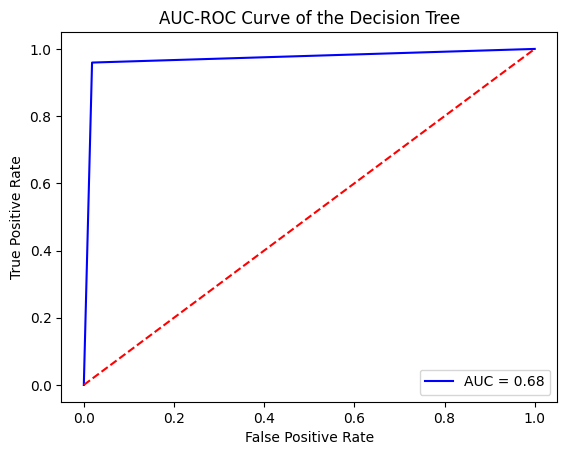

In [51]:
# Generating AUC-ROC

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

dectree.fit(X_train, y_train)

# Making predictions and computing AUC-ROC

y_pred_proba = dectree.predict_proba(X_test)[:, 1]  # Probability of positive class
auc_roc = cross_val_score(dectree, X, y, cv=10, scoring='roc_auc').mean()
print("AUC-ROC Score:", auc_roc)

# Plotting ROC curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve of the Decision Tree')
plt.legend(loc='lower right')
plt.show()

2) RANDOM FOREST

In [52]:
# Using RandomForestCLassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
ranfor = RandomForestClassifier(n_estimators=5, random_state=1)
cv_scores = cross_val_score(ranfor, X, y, cv=10)
cv_scores.mean()

0.7214624700829617

In [53]:
ranfor = ranfor.fit(X_train, y_train)

# Predictions and Evaluation of RF Model

predictions_rf = ranfor.predict(X_test)
acc_rf = accuracy_score(y_true = y_test, y_pred = predictions_rf )
print("Overall accuracy of RFM using test-set is : %f" %(acc_rf*100))

Overall accuracy of RFM using test-set is : 98.248034


In [54]:
print(classification_report(y_test, predictions_rf))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99    136457
           1       0.98      0.97      0.97     66572

    accuracy                           0.98    203029
   macro avg       0.98      0.98      0.98    203029
weighted avg       0.98      0.98      0.98    203029



In [55]:
print(confusion_matrix(y_test, predictions_rf))

[[135023   1434]
 [  2123  64449]]


In [56]:
# AUC Score and F-beta Score:

from sklearn.model_selection import cross_val_score
print('AUC Score:', cross_val_score(ranfor, X, y, cv=10, scoring='roc_auc').mean())

ranfor.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = ranfor.predict(X_test)
print('F-Beta Score:', fbeta_score(y_test, predictions_test, average='binary', beta=0.5))

AUC Score: 0.7571476384031655
F-Beta Score: 0.9761923515013452


AUC-ROC Score: 0.7571476384031655


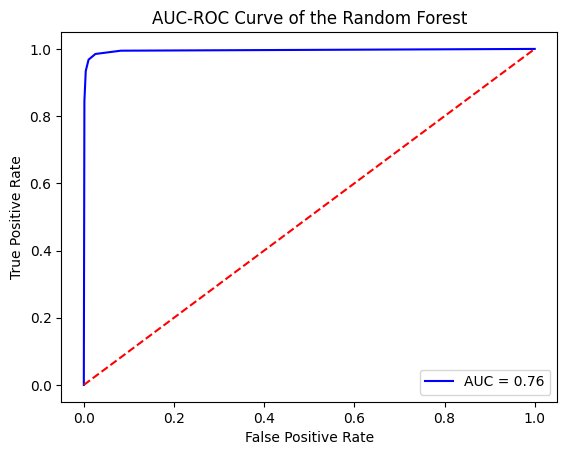

In [57]:
# Generating AUC-ROC

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

ranfor.fit(X_train, y_train)

# Making predictions and computing AUC-ROC

y_pred_proba = ranfor.predict_proba(X_test)[:, 1]  # Probability of positive class
auc_roc = cross_val_score(ranfor, X, y, cv=10, scoring='roc_auc').mean()
print("AUC-ROC Score:", auc_roc)

# Plotting ROC curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve of the Random Forest')
plt.legend(loc='lower right')
plt.show()

3) K-NEAREST-NEIGHBOURS (KNN)

In [58]:
# Exploring the K-Nearest-Neighbors algorithm with a starting value of K=10.
# K is an example of a hyperparameter - a parameter on the model itself which may need to be tuned for best results on the particular data set.

from sklearn import neighbors
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

knn = neighbors.KNeighborsClassifier(n_neighbors=5)
cv_scores = cross_val_score(knn, X, y, cv=10)

cv_scores.mean()

0.7081096606285918

In [59]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [60]:
# Predictions and Evaluation of K-N-N Model

predictions_knn=knn.predict(X_test)
acc_knn = accuracy_score(y_true = y_test, y_pred = predictions_knn)
print("Overall accuracy of kNN using test-set is : %f" %(acc_knn*100))

Overall accuracy of kNN using test-set is : 98.672111


In [61]:
print(classification_report(y_test, predictions_knn))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    136457
           1       0.98      0.98      0.98     66572

    accuracy                           0.99    203029
   macro avg       0.99      0.98      0.98    203029
weighted avg       0.99      0.99      0.99    203029



In [62]:
print(confusion_matrix(y_test, predictions_knn))

[[135297   1160]
 [  1536  65036]]


In [63]:
# AUC Score and F-beta Score:

from sklearn.model_selection import cross_val_score
print('AUC Score:', cross_val_score(knn, X, y, cv=10, scoring='roc_auc').mean())

knn.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = knn.predict(X_test)
print('F-Beta Score:', fbeta_score(y_test, predictions_test, average='binary', beta=0.5))

AUC Score: 0.7189542685155559
F-Beta Score: 0.9813614360385807


AUC-ROC Score: 0.7189542685155559


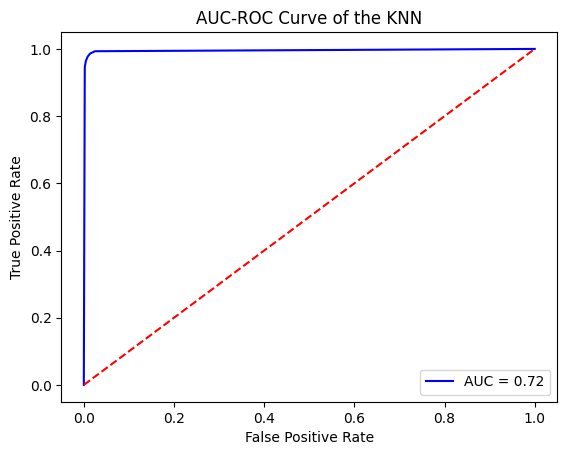

In [64]:
# Generating AUC-ROC

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

knn.fit(X_train, y_train)

# Making predictions and computing AUC-ROC

y_pred_proba = knn.predict_proba(X_test)[:, 1]  # Probability of positive class
auc_roc = cross_val_score(knn, X, y, cv=10, scoring='roc_auc').mean()
print("AUC-ROC Score:", auc_roc)

# Plotting ROC curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve of the KNN')
plt.legend(loc='lower right')
plt.show()

4) NAIVE BAYES

In [65]:
# Trying naive_bayes.GaussianNB classifier and testing how does its accuracy stack up.

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


nb = GaussianNB()
cv_scores = cross_val_score(nb, X, y, cv=10)

cv_scores.mean()

0.7144497024403823

In [66]:
nb.fit(X_train, y_train)

GaussianNB()

In [67]:
# Predictions and Evaluation of NB Model

predictions_nb=nb.predict(X_test)
acc_nb = accuracy_score(y_true = y_test, y_pred = predictions_nb)
print("Overall accuracy of NB using test-set is : %f" %(acc_nb*100))

Overall accuracy of NB using test-set is : 74.472612


In [68]:
print(classification_report(y_test, predictions_nb))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82    136457
           1       0.64      0.51      0.57     66572

    accuracy                           0.74    203029
   macro avg       0.71      0.68      0.69    203029
weighted avg       0.74      0.74      0.74    203029



In [69]:
print(confusion_matrix(y_test, predictions_nb))

[[117531  18926]
 [ 32902  33670]]


In [70]:
# AUC Score and F-beta Score:

from sklearn.model_selection import cross_val_score
print('AUC Score:', cross_val_score(nb, X, y, cv=10, scoring='roc_auc').mean())

nb.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = nb.predict(X_test)
print('F-Beta Score:', fbeta_score(y_test, predictions_test, average='binary', beta=0.5))

AUC Score: 0.7656400898805751
F-Beta Score: 0.6078582879590982


AUC-ROC Score: 0.7656400898805751


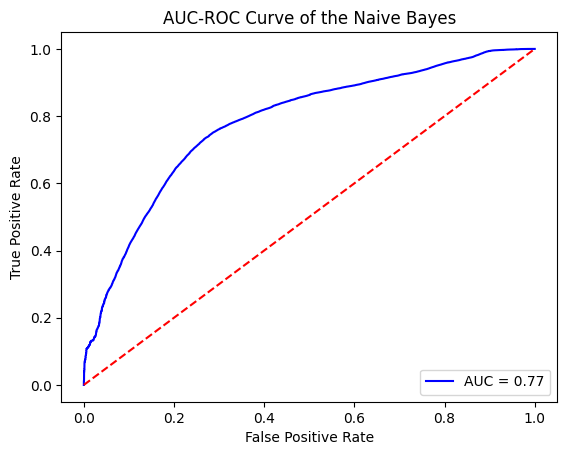

In [71]:
# Generating AUC-ROC

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

nb.fit(X_train, y_train)

# Making predictions and computing AUC-ROC

y_pred_proba = nb.predict_proba(X_test)[:, 1]  # Probability of positive class
auc_roc = cross_val_score(nb, X, y, cv=10, scoring='roc_auc').mean()
print("AUC-ROC Score:", auc_roc)

# Plotting ROC curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve of the Naive Bayes')
plt.legend(loc='lower right')
plt.show()

5) LOGISTIC REGRESSION

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
logreg = LogisticRegression()
cv_scores = cross_val_score(logreg, X, y, cv=10)
cv_scores.mean()

0.7377685478946713

In [73]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [74]:
# Predictions and Evaluation of LR Model

predictions_logreg = logreg.predict(X_test)
acc_logreg = accuracy_score(y_true = y_test, y_pred = predictions_logreg)
print("Overall accuracy of LR using test-set is : %f" %(acc_logreg*100))

Overall accuracy of LR using test-set is : 76.308311


In [75]:
print(classification_report(y_test, predictions_logreg))

              precision    recall  f1-score   support

           0       0.79      0.89      0.83    136457
           1       0.69      0.50      0.58     66572

    accuracy                           0.76    203029
   macro avg       0.74      0.70      0.71    203029
weighted avg       0.75      0.76      0.75    203029



In [76]:
print(confusion_matrix(y_test, predictions_logreg))

[[121536  14921]
 [ 33180  33392]]


In [77]:
# AUC Score and F-beta Score:

from sklearn.model_selection import cross_val_score
cv_scores_roc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()
print('AUC Score:', cv_scores_roc.mean())

logreg.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = logreg.predict(X_test)
print('F-Beta Score:', fbeta_score(y_test, predictions_test, average='binary', beta=0.5))

AUC Score: 0.7899492280134737
F-Beta Score: 0.6425888293614139


AUC-ROC Score: 0.7899492280134737


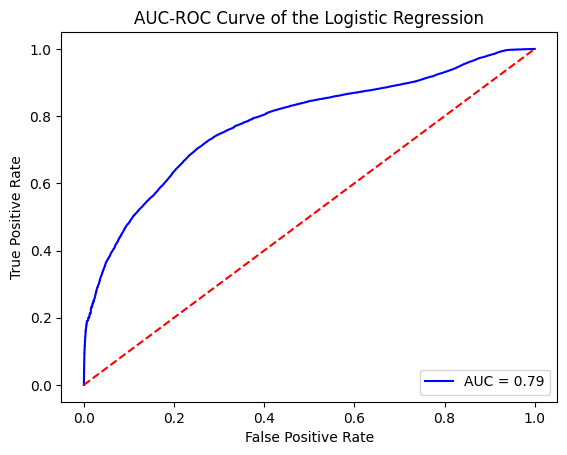

In [78]:
# Generating AUC-ROC

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

logreg.fit(X_train, y_train)

# Making predictions and computing AUC-ROC

y_pred_proba = logreg.predict_proba(X_test)[:, 1]  # Probability of positive class
auc_roc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()
print("AUC-ROC Score:", auc_roc)

# Plotting ROC curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve of the Logistic Regression')
plt.legend(loc='lower right')
plt.show()

6) LINEAR DISCRIMINANT ANALYSIS (LDA)

In [79]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

lda = LinearDiscriminantAnalysis()
cv_scores = cross_val_score(lda, X, y, cv=10)
cv_scores.mean()

0.7334006863903969

In [80]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [81]:
# Predictions and Evaluation of LDA Model

predictions_lda = lda.predict(X_test)
acc_lda = accuracy_score(y_true = y_test, y_pred = predictions_lda)
print("Overall accuracy of LDA using test-set is : %f" %(acc_lda*100))

Overall accuracy of LDA using test-set is : 75.748785


In [82]:
print(classification_report(y_test, predictions_lda))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83    136457
           1       0.68      0.49      0.57     66572

    accuracy                           0.76    203029
   macro avg       0.73      0.69      0.70    203029
weighted avg       0.75      0.76      0.75    203029



In [83]:
print(confusion_matrix(y_test, predictions_lda))

[[121231  15226]
 [ 34011  32561]]


In [84]:
# AUC Score and F-beta Score:

from sklearn.model_selection import cross_val_score
cv_scores_roc = cross_val_score(lda, X, y, cv=10, scoring='roc_auc').mean()
print('AUC Score:', cv_scores_roc.mean())

lda.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = lda.predict(X_test)
print('F-Beta Score:', fbeta_score(y_test, predictions_test, average='binary', beta=0.5))

AUC Score: 0.7871186486141825
F-Beta Score: 0.6317127114698121


AUC-ROC Score: 0.7871186486141825


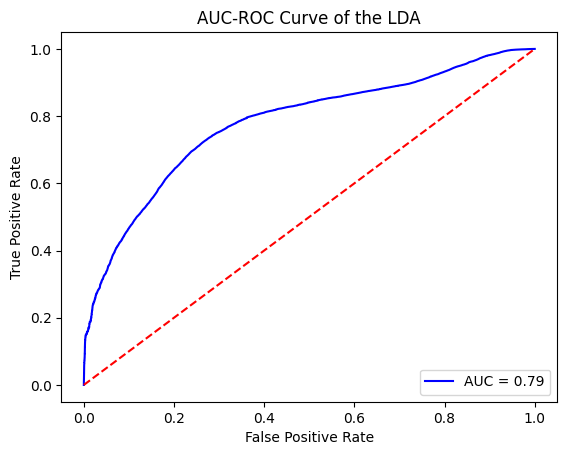

In [85]:
# Generating AUC-ROC

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

lda.fit(X_train, y_train)

# Making predictions and computing AUC-ROC

y_pred_proba = lda.predict_proba(X_test)[:, 1]  # Probability of positive class
auc_roc = cross_val_score(lda, X, y, cv=10, scoring='roc_auc').mean()
print("AUC-ROC Score:", auc_roc)

# Plotting ROC curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve of the LDA')
plt.legend(loc='lower right')
plt.show()

7) QUADRATIC DISCRIMINANT ANALYSIS (QDA)

In [86]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
qda = QuadraticDiscriminantAnalysis()
cv_scores = cross_val_score(qda, X, y, cv=10)
cv_scores.mean()

0.7137059030208176

In [87]:
qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

In [88]:
# Predictions and Evaluation of QDA Model

predictions_qda = qda.predict(X_test)
acc_qda = accuracy_score(y_true = y_test, y_pred = predictions_qda)
print("Overall accuracy of QDA using test-set is : %f" %(acc_qda*100))

Overall accuracy of QDA using test-set is : 74.679479


In [89]:
print(classification_report(y_test, predictions_qda))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81    136457
           1       0.62      0.60      0.61     66572

    accuracy                           0.75    203029
   macro avg       0.71      0.71      0.71    203029
weighted avg       0.75      0.75      0.75    203029



In [90]:
print(confusion_matrix(y_test, predictions_qda))

[[111683  24774]
 [ 26634  39938]]


In [91]:
# AUC Score and F-beta Score:

from sklearn.model_selection import cross_val_score
cv_scores_roc = cross_val_score(qda, X, y, cv=10, scoring='roc_auc').mean()
print('AUC Score:', cv_scores_roc.mean())

qda.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = qda.predict(X_test)
print('F-Beta Score:', fbeta_score(y_test, predictions_test, average='binary', beta=0.5))

AUC Score: 0.7857185267340665
F-Beta Score: 0.6136377604326716


AUC-ROC Score: 0.7857185267340665


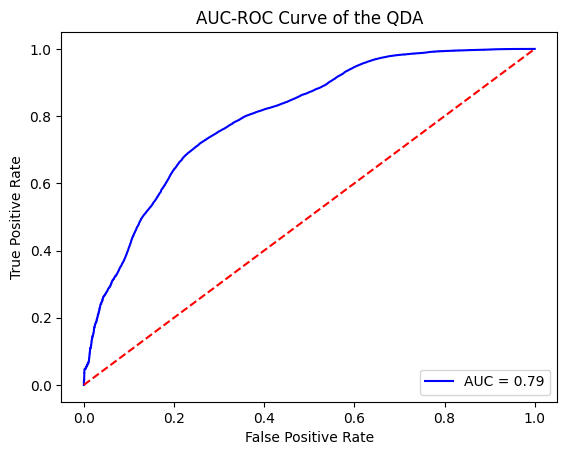

In [92]:
# Generating AUC-ROC

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

qda.fit(X_train, y_train)

# Making predictions and computing AUC-ROC

y_pred_proba = qda.predict_proba(X_test)[:, 1]  # Probability of positive class
auc_roc = cross_val_score(qda, X, y, cv=10, scoring='roc_auc').mean()
print("AUC-ROC Score:", auc_roc)

# Plotting ROC curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve of the QDA')
plt.legend(loc='lower right')
plt.show()

COMPARING THE AUC-ROC CURVE OF EACH MODELS AND REPRESNETING IN GRAPHS.

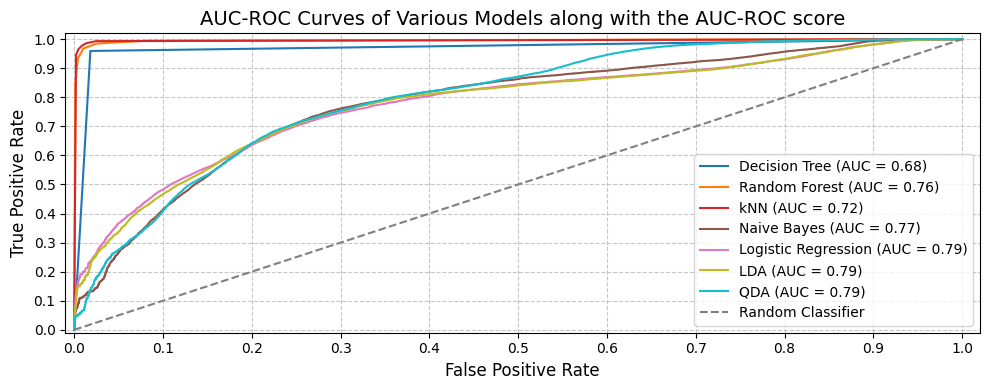

In [93]:
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Fitting different models and computing AUC-ROC scores

models = [dectree, ranfor, knn, nb, logreg, lda, qda]
model_names = ['Decision Tree', 'Random Forest', 'kNN', 'Naive Bayes', 'Logistic Regression', 'LDA', 'QDA']
auc_rocs = []

plt.figure(figsize=(10,4))

# Defining the colors for different models
colors = plt.cm.tab10(np.linspace(0, 1, len(models)))

# Iterating over the models

for model, name, color in zip(models, model_names, colors):
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of positive class
    auc_roc = cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean()
    auc_rocs.append(auc_roc)

    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_roc:.2f})', color=color)

# Plot random classifier line

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Classifier')

# Plot settings

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('AUC-ROC Curves of Various Models along with the AUC-ROC score', fontsize=14)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(0, 2.0, 0.1), fontsize=10)
plt.yticks(np.arange(0, 2.0, 0.1), fontsize=10)
plt.xlim([-0.01, 1.02])
plt.ylim([-0.01, 1.02])
plt.tight_layout()
plt.show()

COMPARING THE ACCURACY OF THE RESPECTIVE MODELS AND REPRESENTING IN GRAPHS

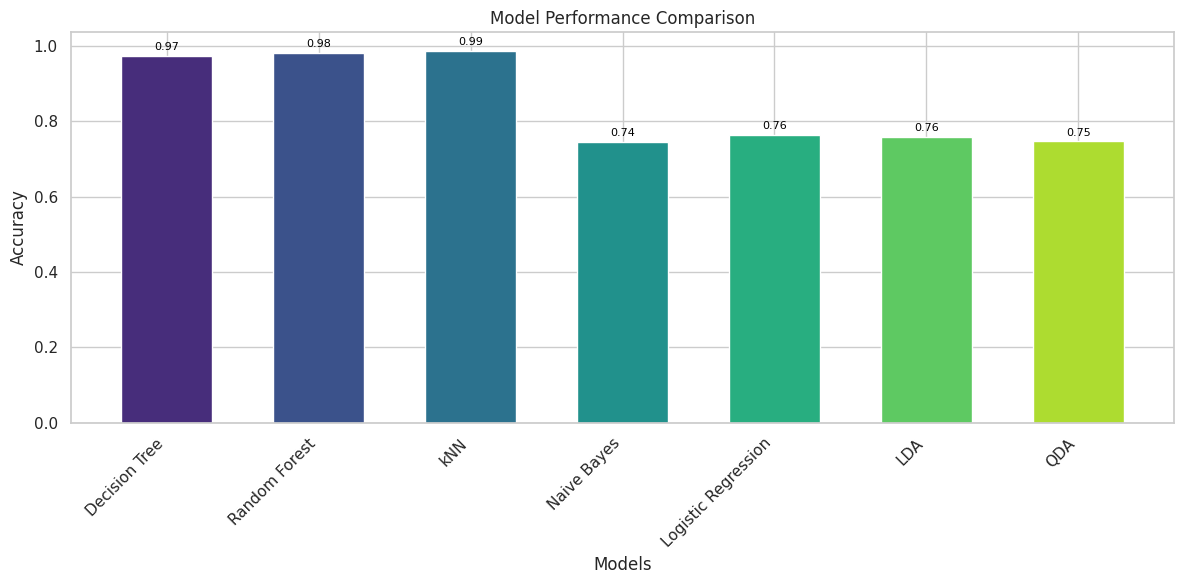

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

li_x = ['Decision Tree', 'Random Forest', 'kNN', 'Naive Bayes', 'Logistic Regression', 'LDA', 'QDA']
li_y = [acc_dectree, acc_rf, acc_knn, acc_nb, acc_logreg, acc_lda, acc_qda]

sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(12, 6))

# Using a sequential colormap for better color representation
colors = sns.color_palette("viridis", len(li_x))

# Adjusting bar positions and widths
bar_positions = range(len(li_x))
bar_width = 0.6

plt.bar(bar_positions, li_y, color=colors, width=bar_width, align='center')

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")

for i, v in zip(bar_positions, li_y):
    plt.text(i, v + 0.01, f"{v:.2f}", ha="center", va="bottom", fontsize=8, color="black")

plt.xticks(bar_positions, li_x, rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [95]:
# Creating a list of tuples with model names and their corresponding accuracies
model_accuracies = list(zip(li_x, li_y))

# Sorting the list of tuples based on accuracy (in descending order)
sorted_model_accuracies = sorted(model_accuracies, key=lambda x: x[1], reverse=True)

# Printing the top two models
top_models = sorted_model_accuracies[:2]

print("Top two models for predicting ASD using this Eye-Tracking Dataset:")
for model, accuracy in top_models:
    print(f"{model}: {accuracy:.2f} accuracy")

Top two models for predicting ASD using this Eye-Tracking Dataset:
kNN: 0.99 accuracy
Random Forest: 0.98 accuracy
